# Import the results

In [1]:
import utilitary
%matplotlib inline

In [143]:
df, date = utilitary.import_results()

Which is the date of your experiment (YYYYMMD)? Provide the path if different from YYYYMMDD 20191113


## Define hue order

In [144]:
hueorder = sorted(list(df['Treatment'].unique())) #get names from the list
hueorder

['Control', 'SLN 0,02X', 'SLN 0,2X', 'SLN 0.1X', 'SLN 1X', 'SLN 2X']

In [136]:
hueorder = ['Control wo/FBS',
 'SLN 0,02X wo/FBS',
 'SLN 0,2X wo/FBS',
 'SLN 0.1X wo/FBS',
 'SLN 1X wo/FBS',
 'SLN 2X wo/FBS'] #ordenate the names as you wish

In [10]:
df

,Unnamed:0,index,Unnamed:0,Well,Cell,Treatment,Slope,Intercept,R^2score,Velocity,Time,Begin,End
0,0,0,0,A1,PNT1A,Control,54.955338,810123.601190,0.990256,0.048996,89.882806,0.0,0.6
1,1,1,1,A2,PNT1A,TGF-B 10 ng/mL,48.396345,868394.053241,0.959893,0.043148,81.997221,0.0,0.6
2,2,2,2,A3,PNT1A,MMC,70.112451,759089.092247,0.842187,0.062509,82.583265,0.0,0.8
3,3,3,3,A4,PC3,Control,74.781239,989308.608853,0.805549,0.066671,26.117823,0.0,0.6
4,4,6,6,B1,PNT1A,Control,54.009627,905892.937338,0.994120,0.048152,61.903489,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,5,8,B3,PNT1A,Methacycline 10 uM,67.943809,781966.203515,0.834788,0.060576,79.607399,0.0,0.6
71,71,6,12,C1,PNT1A,TGF-B 5 ng/mL,101.128938,824173.656061,0.922627,0.090162,46.528447,0.0,0.6
72,72,7,13,C2,PNT1A,TGF-B 5 ng/mL,73.137646,717048.225307,0.944645,0.065206,88.747678,0.0,0.6
73,73,8,14,C3,PNT1A,Methacycline 20 uM,37.226848,866107.815615,0.870007,0.033190,107.623125,0.0,0.6


## Select only positive values of velocity and r2 score higher than 0.75

In [4]:
df = df[(df['Velocity']>0)]
df = df[(df['R^2score']>0.75)] 

## Plot

In [7]:
date = 'SLNComponents'

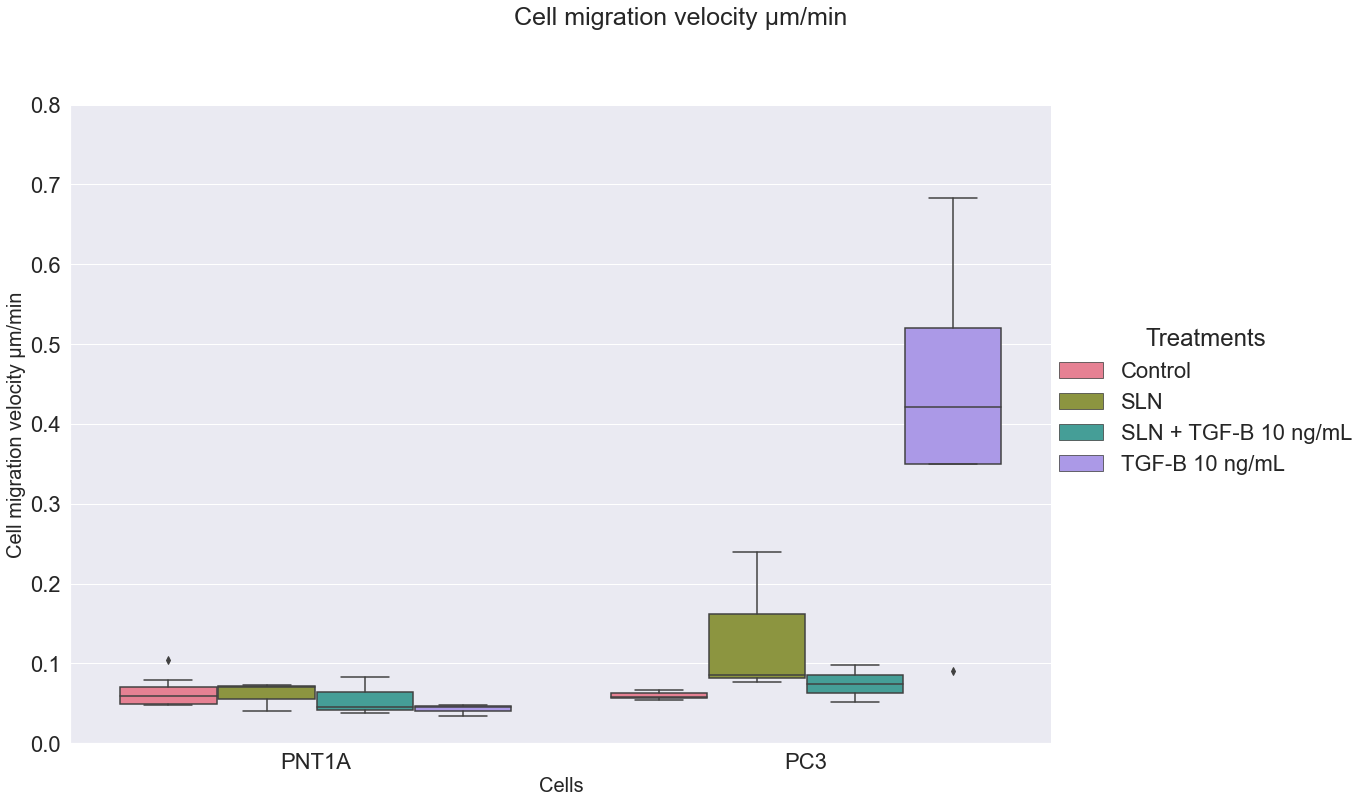

In [9]:
utilitary.plot_all(df, hueorder, date, xaxis = "Cell", yaxis = "Velocity", ylimit = (0,0.8), ylabel = "Cell migration velocity \u03bcm/min")

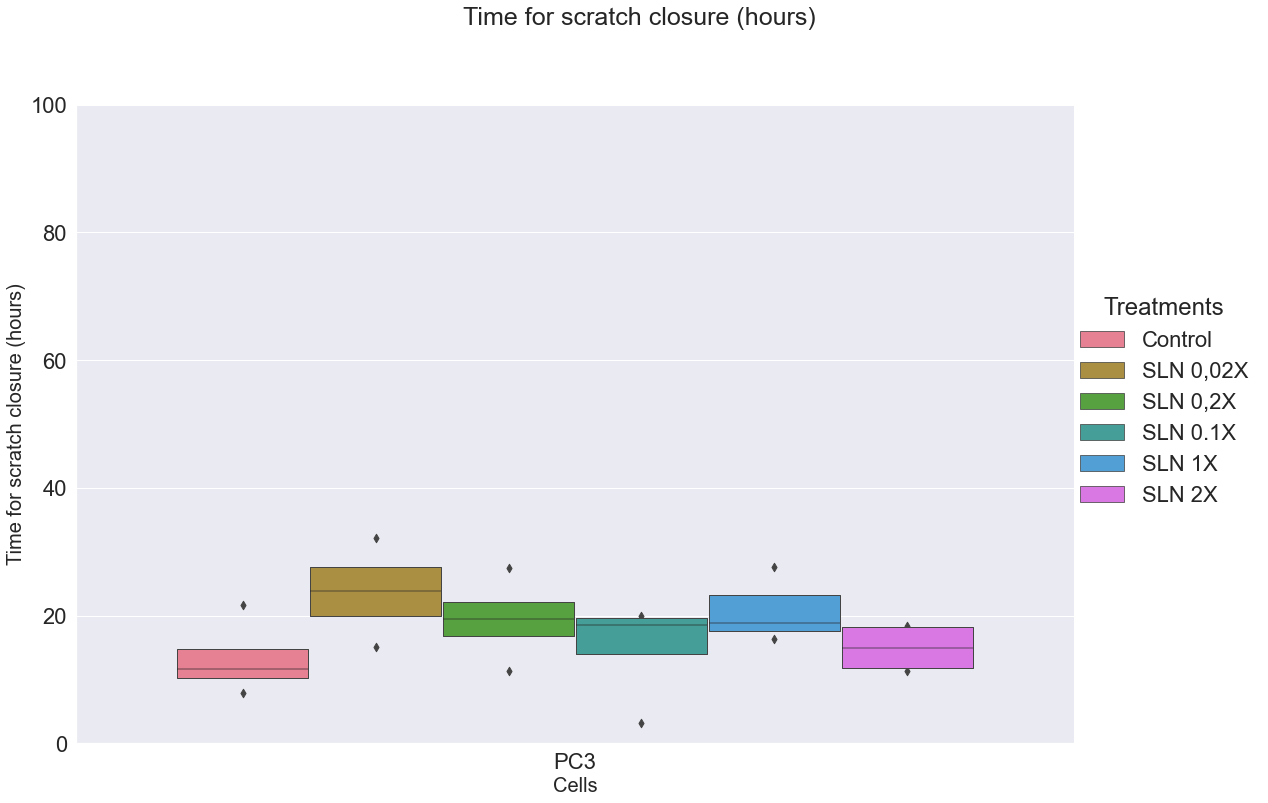

In [147]:
utilitary.plot_all(df, hueorder, date, xaxis = "Cell", yaxis = "Time", ylimit = (0,100), ylabel = "Time for scratch closure (hours)")

## Join data into one dataframe using the date of the assay

In [1]:
import pandas as pd

In [26]:
date1 = input()

 20181102


In [27]:
onerep = pd.read_csv(date1 + "/Results_" + date1 + ".csv", sep= ',')

In [28]:
date2 = input()

 20181116


In [29]:
tworep = pd.read_csv(date2 + "/Results_" + date2 + ".csv", sep= ',')

In [30]:
date3 = input()

 20181123


In [31]:
threerep = pd.read_csv(date3 + "/Results_" + date3 + ".csv", sep= ',')

In [244]:
date4 = input()

 20210423


In [245]:
fourrep = pd.read_csv(date4 + "/Results_" + date4 + ".csv", sep= ',')

In [246]:
date5 = input()

 20210428


In [247]:
fiverep = pd.read_csv(date5 + "/Results_" + date5 + ".csv", sep= ',')

In [32]:
df_total = pd.concat([onerep, 
                      tworep, 
                      threerep,
#                       fourrep,
#                       fiverep
                     ])

In [49]:
df_total = df_total[(df_total['Velocity']>0)]
df_total = df_total[(df_total['R^2score']>0.75)] 

In [34]:
df_total = df_total.reset_index()

In [43]:
df_total.to_csv(assay + '/Replicates.csv')

## Split dataframe to plot only one type of cell

In [21]:
def split_df(df, list_names):
    """Splits dataframe into the specified list_names given in the input
    Output is the dataframe splited"""
    df_trt = df['Cell']
    dflist = [] #saves the for output into this list
    for trt in range(len(df_trt)): #loop through the treatment names
        for name in list_names: #loop through the groups I want to split
            if name in df_trt[trt]: #if the str in the list is contained in the df)
                dflist.append(trt) #append indexes to a list
    df2 = df.copy() #create a copy from df
    df_split = df2.loc[dflist]
    
    return df_split

In [20]:
pc3 = ['PC3'] #define which cell

In [20]:
df_total = df_total.reset_index()

In [22]:
df_pc3 = split_df(df_total, pc3)

## Define hue order

In [35]:
hueorder = sorted(list(df_total['Treatment'].unique()))

In [36]:
hueorder

['Control', 'DOTAP', 'Pluronic F68', 'SLN', 'Stearic Acid', 'TGF-B']

In [293]:
hueorder = ['Control',
 'SLN',
 'SLN + TGF-B 10 ng/mL',
 'TGF-B 1 ng/mL',
 'TGF-B 5 ng/mL',
 'TGF-B 10 ng/mL']

## Provide assay folder name

In [83]:
assay = input()

 SLNComponents


## Plot

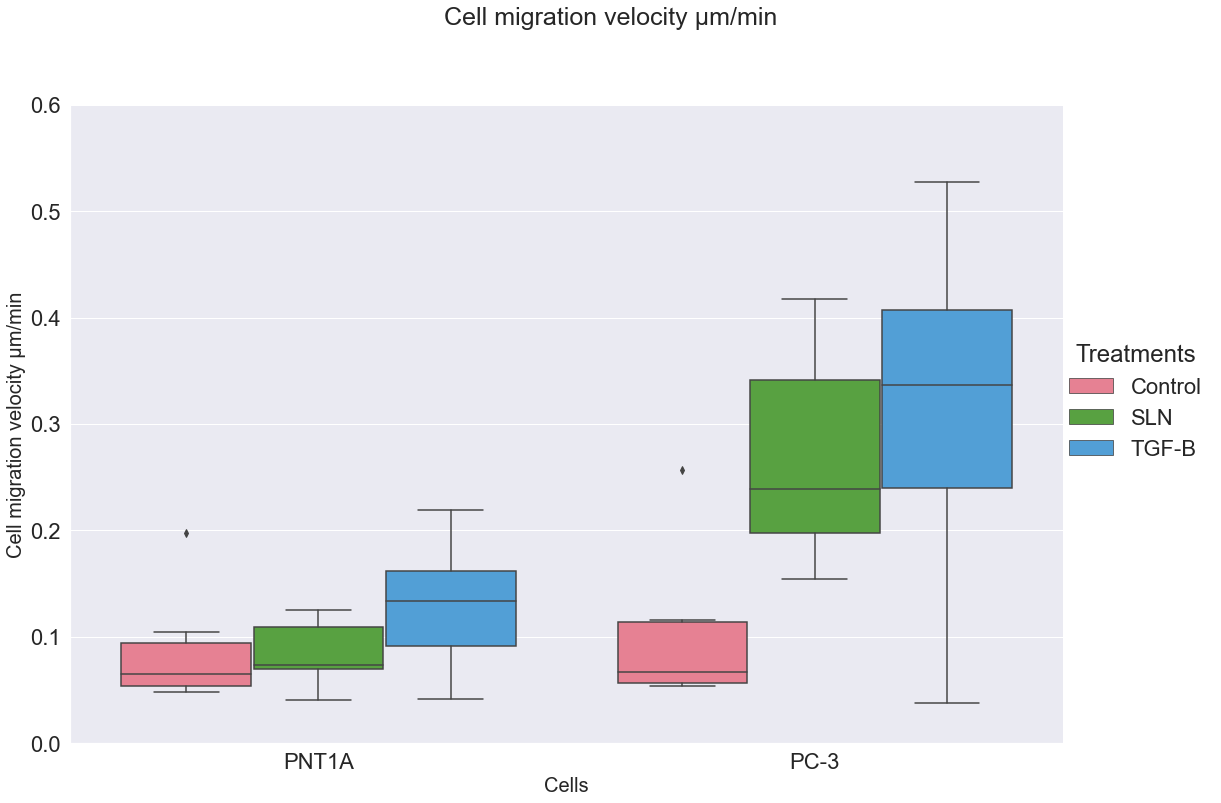

In [84]:
utilitary.plot_all_replicates(df_total, hueorder, xaxis = "Cell", yaxis = "Velocity", ylimit = (0,0.6), ylabel = "Cell migration velocity \u03bcm/min", assay = assay)

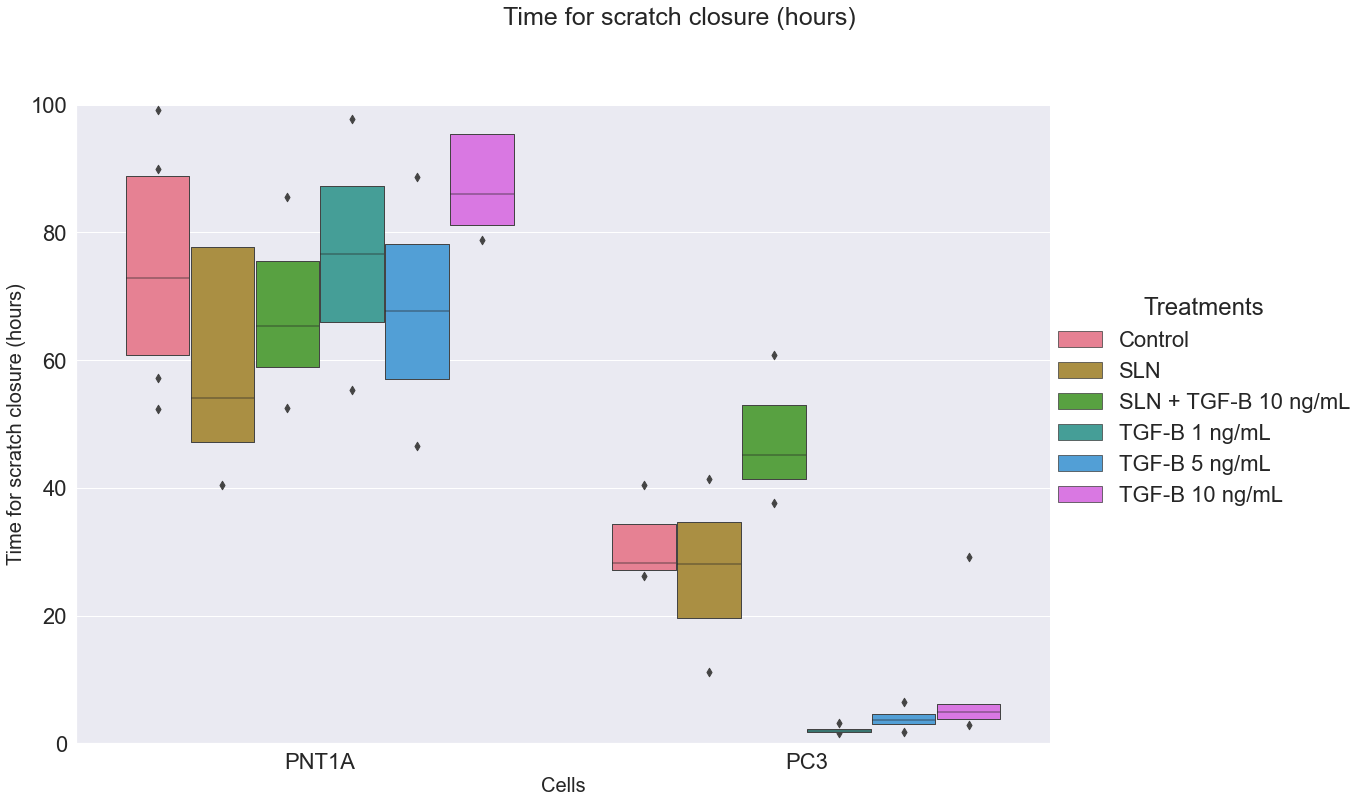

In [297]:
utilitary.plot_all_replicates(df_total, hueorder, xaxis = "Cell", yaxis = "Time", ylimit = (0,100), ylabel = "Time for scratch closure (hours)", assay = assay)